### Content

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
from pprint import pprint

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud


import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Noka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df = pd.read_pickle('df_islam.pkl')

In [6]:
df.shape

(679, 5)

In [7]:
df

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...
31,Islam is a Religion of Peace- Intelligence Squ...,islam peace intelligence squared,"[islam, peace, intelligence, squared]","[islam, peace, intelligence, squared]",islam peace intelligence squared
95,"Islam is perfect I am not , blame my mistakes ...",islam perfect blame mistakes,"[islam, perfect, blame, mistakes]","[islam, perfect, blame, mistakes]",islam perfect blame mistakes
175,Islam is a religion of peace....wat een fantas...,islam peace fantastisch debat,"[islam, peace, fantastisch, debat]","[islam, peace, fantastisch, debat]",islam peace fantastisch debat
386,Islam is a Political CULT! It is not a religio...,islam political cult president financing murde...,"[islam, political, cult, president, financing,...","[islam, political, cult, president, financing,...",islam political cult president financing murde...
504,Islam is not a religion or a race...it is a cu...,islam race cult that glorifies death,"[islam, race, cult, that, glorifies, death]","[islam, race, cult, glorifies, death]",islam race cult glorifies death
546,Islam is the only religion that calls for beli...,islam only that calls believing prophets with ...,"[islam, only, that, calls, believing, prophets...","[islam, calls, believing, prophets, discrimina...",islam calls believing prophets discrimination
551,Islam is the religion of ease not of hardships...,islam ease hardships justice brotherhood love ...,"[islam, ease, hardships, justice, brotherhood,...","[islam, ease, hardships, justice, brotherhood,...",islam ease hardships justice brotherhood love ...
555,Islam is the last divine religion. The Holy Qu...,islam last divine holy quran last book sent do...,"[islam, last, divine, holy, quran, last, book,...","[islam, last, divine, holy, quran, last, book,...",islam last divine holy quran last book sent al...
570,Islam is the Religion of Truth which has all t...,islam truth which answers consistent with both...,"[islam, truth, which, answers, consistent, wit...","[islam, truth, answers, consistent, logic, hum...",islam truth answers consistent logic human nature


In [8]:
df = df.drop(['tidy_tweet','tidy_tweet_tokens','no_stop_joined'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 49190
Data columns (total 2 columns):
tweet_text        679 non-null object
tokens_no_stop    679 non-null object
dtypes: object(2)
memory usage: 15.9+ KB


In [10]:
df.head()

,tweet_text,tokens_no_stop
0,Islam is a religion full of blessings and good...,"[islam, full, blessings, good, deeds, also, re..."
31,Islam is a Religion of Peace- Intelligence Squ...,"[islam, peace, intelligence, squared]"
95,"Islam is perfect I am not , blame my mistakes ...","[islam, perfect, blame, mistakes]"
175,Islam is a religion of peace....wat een fantas...,"[islam, peace, fantastisch, debat]"
386,Islam is a Political CULT! It is not a religio...,"[islam, political, cult, president, financing,..."


### Pre-Processing

#### Remove Links 

In [11]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [12]:
df['tweet_text_p'] = np.vectorize(remove_links)(df['tweet_text'])

In [13]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"twitter.com\S+", "", tweet)
    return tweet_no_link

In [14]:
df['tweet_text_p'] = np.vectorize(remove_links)(df['tweet_text_p'])

#### Remove Twitter Handlers (@Users)

In [15]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [16]:
df['tweet_text_p'] = np.vectorize(remove_users)(df['tweet_text_p'], "@ [\w]*", "@[\w]*")

#### Remove Hashtag Symbol

In [14]:
# We decided to keep hashtags because they add value to the sentiment.
# Example df.tweet_text[20]
def remove_hashtags(tweet, pattern1):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [15]:
df['tweet_text_p'] = np.vectorize(remove_hashtags)(df['tweet_text_p'], "#")

#### Remove Collection Words (Religion) 

In [18]:
# It adds to the neutrality of the tweet as the compound score is the sum of all words sentiment score. 
# Example df.tweet_text[43]
def remove_word(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, "", tweet)
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [19]:
df['tweet_text_p'] = np.vectorize(remove_word)(df['tweet_text_p'], "religion", "Religion")

#### Do not Remove Punctuation 

In [20]:
# Removing Punctuation has no significant impact in most cases 
# In some cases reduces the neutrality because of words in parentheses
# Example df.tweet_text[50]
# df['pre_processed_1'] = df['pre_processed'].str.replace("[^a-zA-Z#]", " ")

#### Remove Duplicates

In [21]:
df.drop_duplicates(subset=['tweet_text_p'], keep='first', inplace=True)

In [22]:
df = df[~df.tweet_text_p.str.contains("Retweeted")]

In [23]:
df.shape

(669, 3)

### Applying VADER Sentiment Analyzer

In [24]:
# Create an object of Vader Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [25]:
negative = []
neutral = []
positive = []
compound = []

In [26]:
def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['tweet_text_p']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])

In [27]:
# Function calling 
sentiment_scores(df, negative, neutral, positive, compound)

In [28]:
# Prepare columns to add the scores later
df["negative"] = negative
df["neutral"] = neutral
df["positive"] = positive
df["compound"] = compound

In [29]:
# Fill the overall sentiment with encoding:
# (-1)Negative, (0)Neutral, (1)Positive
sentiment = []
for i in df['compound']:
    if i >= 0.05 : 
        sentiment.append(1)
  
    elif i <= - 0.05 : 
        sentiment.append(-1) 
        
    else : 
        sentiment.append(0)
df['sentiment'] = sentiment

In [30]:
neg_tweets = df.sentiment.value_counts()[-1]
neu_tweets = df.sentiment.value_counts()[0]
pos_tweets = df.sentiment.value_counts()[1]

### Number of tweets by sentiment

#### Pie Chart 

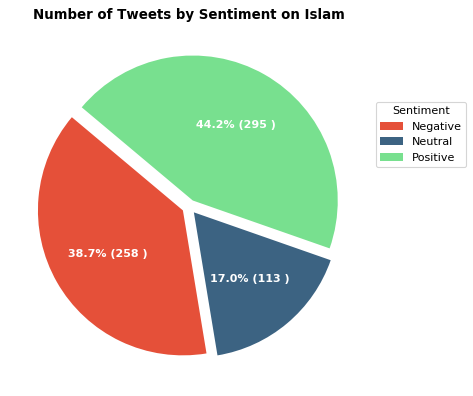

In [89]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Tweets by Sentiment on Islam", fontsize=12, fontweight="bold")
plt.show()

#### Histogram

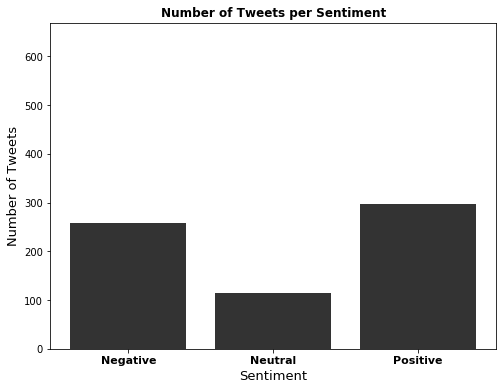

In [32]:
labels = ['Negative', 'Neutral', 'Positive']
freq = [df.sentiment.value_counts()[-1], df.sentiment.value_counts()[0], df.sentiment.value_counts()[1]]
index = np.arange(len(freq))

plt.figure(figsize=(8,6))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11, fontweight="bold") 
plt.title('Number of Tweets per Sentiment', fontsize=12, fontweight="bold")
plt.ylim(0, len(df['tweet_text']))
plt.show()

#### Density Plot of Overall compound score

In [33]:
# We remove the neutral compound scores to compare the negative and positive tweets
data = df[(df["sentiment"]!=0)]

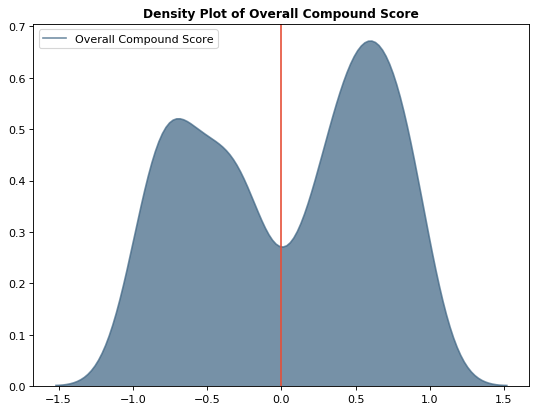

In [34]:
# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(data["compound"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

### Word Cloud of Positive and Negative Tweets 

#### Lemmatization

In [35]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [36]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [37]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = lemmatization(df['tokens_no_stop'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [38]:
df.drop(['tokens_no_stop'], axis=1, inplace=True)

In [39]:
df_pos = df[df['sentiment']==1]
df_neg = df[df['sentiment']==(-1)]

### Word Frequency

In [63]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [64]:
df_neg['no_stop_joined'] = df_neg.apply(rejoin_words, axis=1)

/Users/Noka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
word_freq = pd.Series(np.concatenate([x.split() for x in df_neg.no_stop_joined])).value_counts()

In [67]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

In [73]:
word_df.drop([ 0, 1], inplace=True)

Unique words: 1073


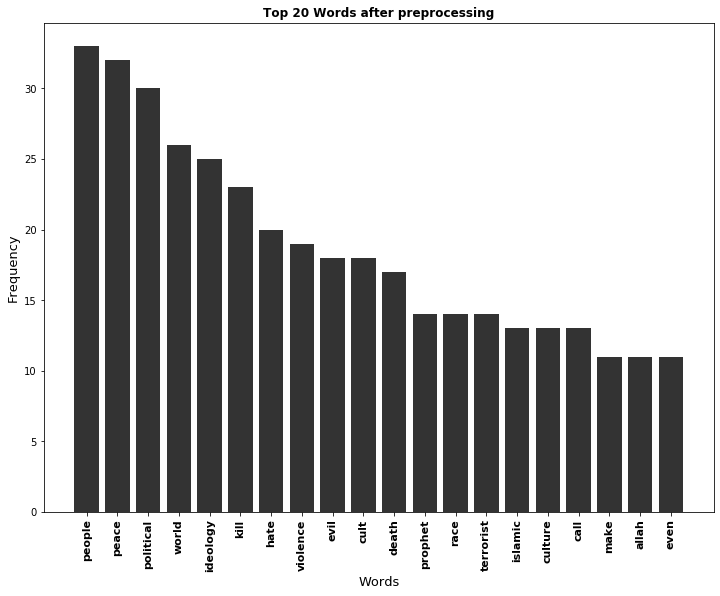

In [74]:
label = word_df['word'].head(20)
freq = word_df['freq'].head(20)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 20 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

### Positive Tweets

In [75]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [76]:
df_pos['no_stop_joined'] = df_pos.apply(rejoin_words, axis=1)

/Users/Noka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
word_freq_pos = pd.Series(np.concatenate([x.split() for x in df_pos.no_stop_joined])).value_counts()

In [78]:
word_df_pos = pd.Series.to_frame(word_freq_pos)
word_df_pos['word'] = list(word_df_pos.index)
word_df_pos.reset_index(drop=True, inplace=True)
word_df_pos.columns = ['freq', 'word']

In [83]:
word_df_pos.drop([0,2], inplace=True)

Unique words: 995


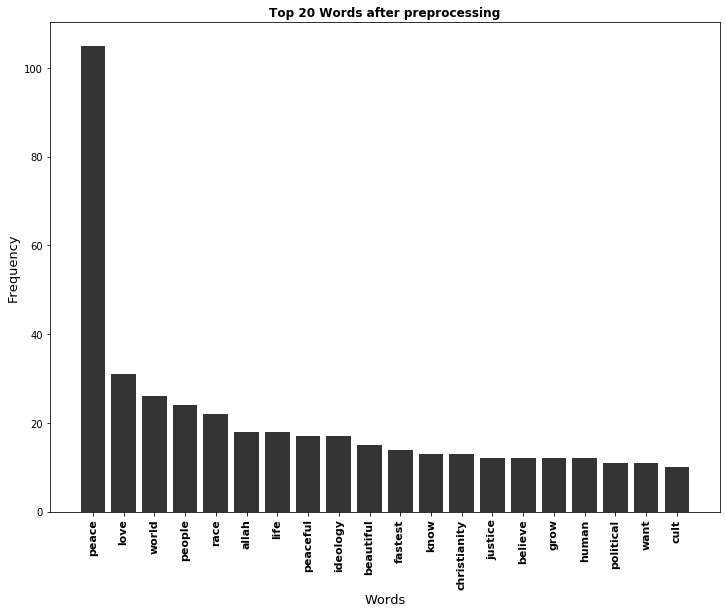

In [85]:
label = word_df_pos['word'].head(20)
freq = word_df_pos['freq'].head(20)
index = np.arange(len(freq))

print("Unique words:", len(word_df_pos))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 20 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [120]:
word_df_pos.head(20)

,freq,word
1,105,peace
3,31,love
4,26,world
5,24,people
6,22,race
7,18,allah
8,18,life
9,17,peaceful
10,17,ideology
11,15,beautiful


In [121]:
word_df.head(20)

,freq,word
2,33,people
3,32,peace
4,30,political
5,26,world
6,25,ideology
7,23,kill
8,20,hate
9,19,violence
10,18,evil
11,18,cult


### WordCloud 

In [41]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [42]:
all_words_pos = ' '.join([text for text in df_pos.apply(rejoin_words, axis=1)])
all_words_neg = ' '.join([text for text in df_neg.apply(rejoin_words, axis=1)])

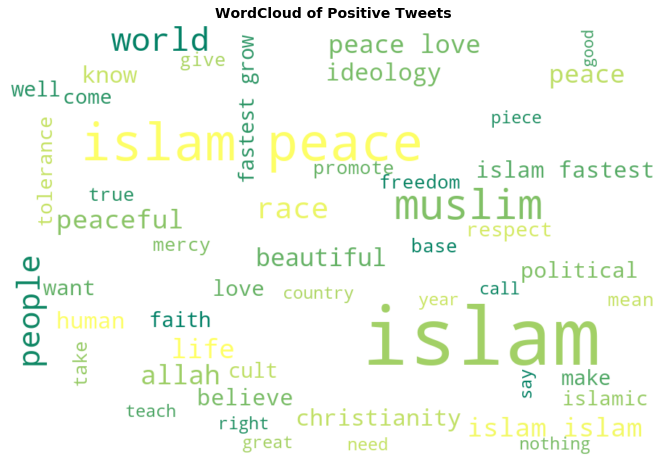

In [52]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='white', 
                      max_words=50,colormap='summer').generate(all_words_pos)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Positive Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

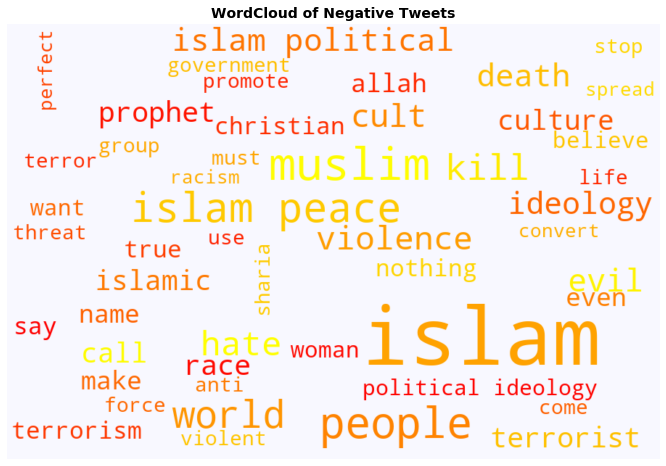

In [53]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=50,colormap='autumn').generate(all_words_neg)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Negative Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Compound Score Distribution 

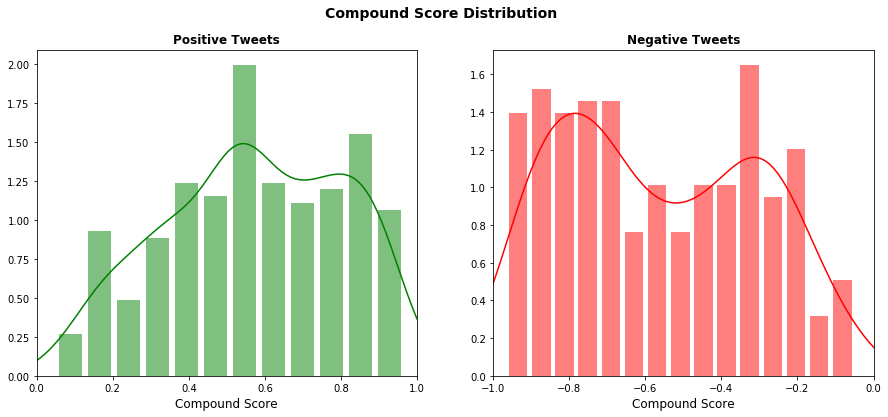

In [50]:
x1 = df_pos['compound']
x2 = df_neg['compound']
plt.figure(figsize=(15,6))
plt.suptitle('Compound Score Distribution', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)

sns.distplot(x1, color="g", bins=12, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title('Positive Tweets',fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([0,1])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="r", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Negative Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([-1,0])

plt.show()

In [54]:
x1.describe()

count    296.000000
mean       0.569954
std        0.231792
min        0.050700
25%        0.381450
50%        0.556850
75%        0.769225
max        0.966300
Name: compound, dtype: float64

In [55]:
x2.describe()

count    259.000000
mean      -0.563770
std        0.256681
min       -0.964600
25%       -0.793500
50%       -0.598300
75%       -0.325200
max       -0.051600
Name: compound, dtype: float64

### Box Plot

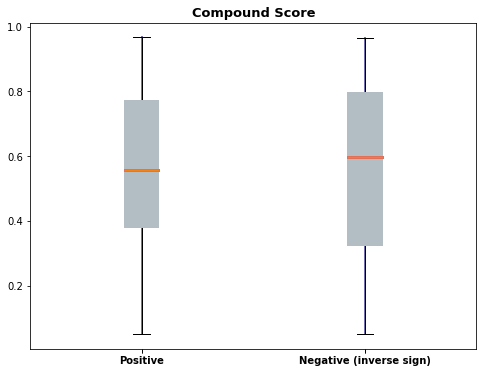

In [56]:
data_to_plot = [x1,(x2)*-1]
# Box-plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#b2bec3', linewidth=2)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#e17055', linewidth=3)
plt.boxplot(data_to_plot)
plt.title('Compound Score', fontsize=13, fontweight='bold')
ax.set_xticklabels(['Positive', 'Negative (inverse sign)'], fontweight='bold')
plt.show()

### 10 Most Positive and Negative Tweets

In [129]:
# 10 Most positive Tweets
df_pos.sort_values('compound', inplace=True, ascending=False)
df_pos.reset_index(drop=True, inplace=True)

/Users/Noka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
df_pos.head(10)

,tweet_text,tweet_text_p,negative,neutral,positive,compound,sentiment,lemmatized,no_stop_joined
0,Islam is completely intolerant? Lmao a religio...,Islam is completely intolerant? Lmao a that r...,0.000,0.328,0.672,0.9663,1,"[islam, completely, intolerant, lmao, reward, ...",islam completely intolerant lmao reward smile ...
1,Islam is a religion of Peace. Had it been othe...,Islam is a of Peace. Had it been otherwise yo...,0.000,0.650,0.350,0.9540,1,"[islam, peace, otherwise, probably, tweet, mus...",islam peace otherwise probably tweet muslim wo...
2,Islam is the religion of mercy and humanity an...,Islam is the of mercy and humanity and extend...,0.000,0.569,0.431,0.9509,1,"[islam, mercy, humanity, extend, help, hand, n...",islam mercy humanity extend help hand need con...
3,Islam is the religion of peace and love we mus...,Islam is the of peace and love we muslims nev...,0.000,0.692,0.308,0.9507,1,"[islam, peace, love, muslim, never, hurt, sent...",islam peace love muslim never hurt sentiment m...
4,"Islam is a strong religion, the source of peac...","Islam is a strong , the source of peace. It ha...",0.079,0.614,0.307,0.9382,1,"[islam, strong, source, peace, strong, life, p...",islam strong source peace strong life pillar l...
5,"Islam is the true face of Peace, tolerance and...","Islam is the true face of Peace, tolerance and...",0.000,0.720,0.280,0.9246,1,"[islam, true, face, peace, tolerance, humanity...",islam true face peace tolerance humanity respe...
6,Islam not only a religion of peace but also is...,Islam not only a of peace but also is a of f...,0.038,0.698,0.263,0.9228,1,"[islam, peace, also, fairness, justice, kindly...",islam peace also fairness justice kindly study...
7,Islam is a religion of tenderness of love and ...,Islam is a of tenderness of love and affectio...,0.000,0.348,0.652,0.9201,1,"[islam, tenderness, love, affection, human, di...",islam tenderness love affection human dignity
8,"Islam is perfect but Muslims are not, Islam is...","Islam is perfect but Muslims are not, Islam is...",0.000,0.776,0.224,0.9186,1,"[islam, perfect, muslim, islam, make, take, su...",islam perfect muslim islam make take suit indi...
9,"Islam teaches upholding honor, dignity. Islam ...","Islam teaches upholding honor, dignity. Islam ...",0.000,0.569,0.431,0.9169,1,"[islam, teach, uphold, honor, dignity, islam, ...",islam teach uphold honor dignity islam brother...


In [111]:
# 10 Most Negative Tweets
df_neg.sort_values('compound', inplace=True)
df_neg.reset_index(drop=True, inplace=True)

/Users/Noka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
df_neg.head(10)

,tweet_text,tweet_text_p,negative,neutral,positive,compound,sentiment,lemmatized,no_stop_joined
0,Islam ki izzat main koi kami nahi hogi memes s...,Islam ki izzat main koi kami nahi hogi memes s...,0.307,0.693,0.000,-0.9646,-1,"[islam, izzat, main, kami, nahi, hogi, meme, f...",islam izzat main kami nahi hogi meme follower ...
1,Islam is a religion that advocates hatred and ...,Islam is a that advocates hatred and violence...,0.408,0.546,0.046,-0.9595,-1,"[islam, advocate, hatred, violence, terrorism,...",islam advocate hatred violence terrorism read ...
2,Islam is the ultimate cop-out religion. Blamin...,Islam is the ultimate cop-out . Blaming everyt...,0.429,0.510,0.061,-0.9584,-1,"[islam, ultimate, blame, everything, everyone,...",islam ultimate blame everything everyone chaot...
3,"Islam is a terrorist, hateful religion, and Ko...","Islam is a terrorist, hateful , and Koran is t...",0.479,0.459,0.061,-0.9545,-1,"[islam, terrorist, hateful, koran, book, promo...",islam terrorist hateful koran book promote ter...
4,"Islam is a terrorist, hateful religion, and Ko...","Islam is a terrorist, hateful , and Koran is t...",0.445,0.498,0.057,-0.9545,-1,"[islam, terrorist, hateful, koran, book, promo...",islam terrorist hateful koran book promote ter...
5,Islam is a false religion and Muhammed was an ...,Islam is a false and Muhammed was an evil man...,0.522,0.478,0.000,-0.9544,-1,"[islam, false, muhamme, evil, allah, satan, co...",islam false muhamme evil allah satan come stea...
6,"Islam is a guidebook that promotes robbing, ra...","Islam is a guidebook that promotes robbing, ra...",0.375,0.495,0.130,-0.9468,-1,"[islam, guidebook, promote, rob, rape, murder,...",islam guidebook promote rob rape murder profes...
7,"Islam is not a religion of peace, it is a reli...","Islam is not a of peace, it is a of war beca...",0.434,0.566,0.000,-0.9464,-1,"[islam, peace, become, islam, mean, submission...",islam peace become islam mean submission rape kid
8,Islam is a religion that advocates hatred and ...,Islam is a that advocates hatred and violence...,0.370,0.533,0.097,-0.9460,-1,"[islam, advocate, hatred, violence, terrorism,...",islam advocate hatred violence terrorism read ...
9,"Islam is a religion, middle eastern is their r...","Islam is a , middle eastern is their race, rad...",0.398,0.602,0.000,-0.9451,-1,"[islam, middle, eastern, race, radical, islam,...",islam middle eastern race radical islam ideolo...


#### Normalization used by VADER
#### $latex \large \dfrac{x}{\sqrt{x^2 + \alpha}}$

#### Save Results as a Dataframe

In [53]:
df.drop(['tweet_text_p', 'lemmatized'], axis=1, inplace=True)

In [54]:
df.to_pickle('sentiment_analysis_vader_results.pkl')

# END